In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

%matplotlib inline

In [4]:
fin_data = pd.read_csv('ftse_data_wrangled.csv', parse_dates=True)

In [5]:
fin_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SYMBOL,date
0,997.500000,1001.400024,997.500000,997.500000,0,0,0,^FTSE,1984-01-03
1,997.500000,999.500000,993.299988,998.599976,0,0,0,^FTSE,1984-01-04
2,1007.099976,1015.799988,1007.099976,1015.799988,0,0,0,^FTSE,1984-01-05
3,1019.000000,1029.300049,1019.000000,1029.000000,0,0,0,^FTSE,1984-01-06
4,1030.599976,1035.400024,1030.599976,1034.599976,0,0,0,^FTSE,1984-01-09


In [6]:
fin_data["date"].describe()

count           9529
unique          9529
top       1984-01-03
freq               1
Name: date, dtype: object

## Data prep for correct plotting

In [7]:
fin_data["date"] = pd.to_datetime(fin_data["date"])
fin_data = fin_data.set_index("date")

In [8]:
fin_data['SMA'] = fin_data['Close'].rolling(20).mean()
fin_data['STD'] = fin_data['Close'].rolling(20).std()

fin_data['BOLU'] = fin_data['SMA'] + (fin_data['STD']*2)
fin_data['BOLD'] = fin_data['SMA'] - (fin_data['STD']*2)

In [9]:
startdate = pd.to_datetime("2020-2-1")
enddate = pd.to_datetime("2021-1-1")

FTSE = fin_data.loc[startdate:enddate]

In [12]:
FTSE.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SYMBOL,SMA,STD,BOLU,BOLD
date,,,,,,,,,,,,
2020-12-23,6453.200195,6497.299805,6431.200195,6495.799805,807695400,0,0,^FTSE,6485.494946,90.437807,6666.370559,6304.619333
2020-12-24,6495.799805,6530.299805,6479.600098,6502.100098,477470700,0,0,^FTSE,6491.044946,87.704718,6666.454382,6315.635510
2020-12-29,6502.100098,6676.600098,6502.100098,6602.700195,824116800,0,0,^FTSE,6503.034961,85.631022,6674.297005,6331.772917
2020-12-30,6602.700195,6623.000000,6552.500000,6555.799805,425493000,0,0,^FTSE,6512.444946,80.128626,6672.702198,6352.187694
2020-12-31,6555.799805,6555.799805,6439.399902,6460.500000,316943900,0,0,^FTSE,6522.159937,57.200256,6636.560449,6407.759424


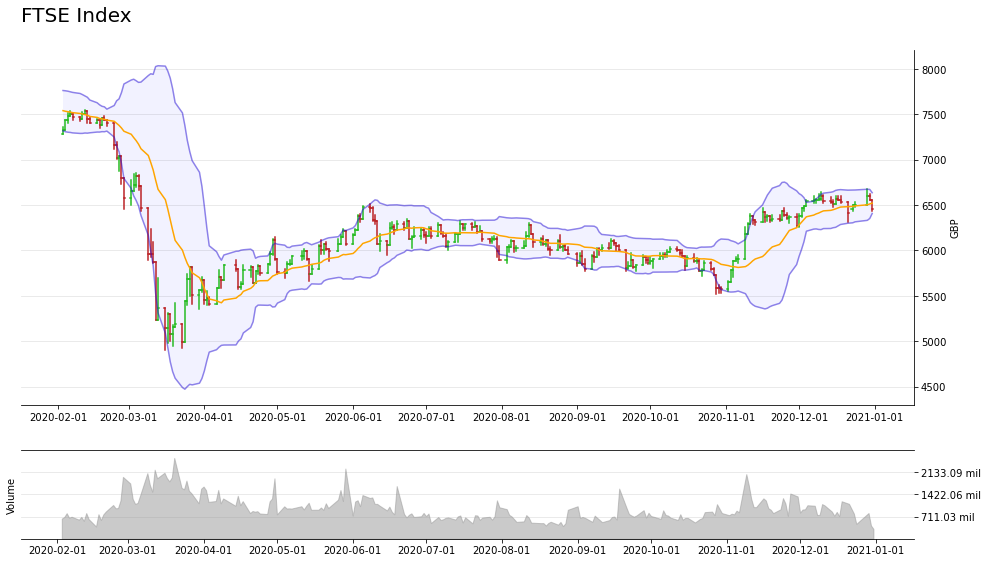

In [9]:
fig, (ax, ax2) = plt.subplots(2, figsize=(16, 9), gridspec_kw={'height_ratios': [4, 1]})

for ind, val in FTSE.iterrows():
    color = '#24bb20'
    if val['Open'] > val['Close']: color = '#bb2024'
        
    #Plotting lines
    ax.plot([ind, ind], [val['Low'], val['High']], color = color)
    
    #Plotting O/C ticks
    ax.plot([ind, ind - pd.to_timedelta('12 h')], [val['Open'], val['Open']], color = color)
    ax.plot([ind, ind + pd.to_timedelta('12 h')], [val['Close'], val['Close']], color = color)

    
#Bollinger Bands
ax.plot(FTSE.index, FTSE['BOLU'], color='#210bd4', alpha=0.5)
ax.plot(FTSE.index, FTSE['BOLD'], color='#210bd4', alpha=0.5)

ax.fill_between(FTSE.index, FTSE['BOLD'], FTSE['BOLU'], facecolor='blue', alpha=0.05)

#SMA
ax.plot(FTSE.index, FTSE['SMA'], color="orange")

# Top plot ticks
months = mdates.MonthLocator()
fmt = mdates.DateFormatter('%Y-%m-%d')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(fmt)

ax2.xaxis.set_major_locator(months)
ax2.xaxis.set_major_formatter(fmt)


# Labels
ax2.set_ylabel('Volume')


# Grid
ax.yaxis.grid(color='black', which='both', alpha=0.1)
ax2.set_axisbelow(True)
ax2.yaxis.grid(color='black', which='major', alpha=0.1)


# Removing Spines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)


#Setting Y-axis
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.set_ylabel('GBP')


# Plotting volume
ax2.fill_between(FTSE.index, FTSE['Volume'], color='#969696', alpha=0.5)


# Get max volume + 10%
mx_v = FTSE['Volume'].max() * 1.1
# Set y-axis ticks 0 to max in 4 steps
yt_ax2 = range(0, int(mx_v + 1), int(mx_v/4))

# Labels for ticks, replacing 10^6 with 'mil'
yt_ax2_labels = ['{:.2f} mil'.format(i/1000000) for i in yt_ax2]
ax2.yaxis.tick_right()

# Plot y-axis ticks, skipping 0 and max
plt.yticks(yt_ax2[1:-1], yt_ax2_labels[1:-1])
plt.ylim(0, mx_v)

ax.set_title('FTSE Index\n', loc='left', fontsize=20)

fig.savefig("FTSE Index.png", dpi=60)